In [22]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# GET the webpage
and check the status code to know it was successful

In [2]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)

response.status_code

200

# EXTRACT data from html 

In [3]:
music = BeautifulSoup(response.content, 'lxml')
print(music.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


# Place the data 
separate objects unless put into a list

In [4]:
names = music.find_all('div', attrs = {'class': 'vertical-card_content--title'})
names

[<div class="vertical-card_content--title">
 <h3>Roy Acuff</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Alabama</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bill Anderson</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Eddy Arnold</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Chet Atkins</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Gene Autry</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>DeFord Bailey</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bobby Bare</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Johnny Bond</h3>
 </div>]

# Loop to clean data

In [5]:
artists = []
for i in range(len(names)):
    name = names[i].get_text().replace("\n", "")
    artists.append(name)
print(artists)
type(names)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']


bs4.element.ResultSet

# Again for the years

year = []
for element in x:
    year.append(element.strip())

print(year)



.get_text()

In [6]:
years = music.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
type(years)

bs4.element.ResultSet

In [7]:
inducted = []
for i in range(len(years)):
    yr = years[i].get_text().replace("\n", "").replace("Inducted ", "").strip()
    inducted.append(yr)
print(inducted)

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']


# Make names and years into a df

In [8]:
combo =pd.DataFrame(list(zip(artists,inducted)),columns=['Name','Inducted'])
combo

,Name,Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


# Combine and GET all URLs

In [9]:
home_url = str('https://countrymusichalloffame.org/hall-of-fame/members')
home_url

'https://countrymusichalloffame.org/hall-of-fame/members'

In [42]:
pages = [home_url]
page = 2
for n in range(15):
    address = home_url+'/page/'+str(page)
    pages.append(address)
    page +=1
for i in pages:
    get_pages = requests.get(i)
    page_soup = BeautifulSoup(get_pages.content, 'lxml')
pages

['https://countrymusichalloffame.org/hall-of-fame/members',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/2',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/3',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/4',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/5',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/6',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/7',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/8',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/9',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/10',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/11',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/12',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/13',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/14',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/1

In [53]:
artists_all = []
years_all = []
find_name = page_soup.find_all('div', attrs = {'class': 'vertical-card_content--title'})
find_year = page_soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
rangen = len(find_name)
rangey = len(find_year)

for i in pages:
    get_pages = requests.get(i)
    page_soup = BeautifulSoup(get_pages.content, 'lxml')
    for i in range(rangen):
        name = find_name[i].text.replace("\n", "").strip()
        artists_all.append(name) 
    for i in range(rangey):
        years = find_year[i].text.replace("\n", "").replace("Inducted", "").strip()
        years_all.append(years)
artists_all , years_all


(['Hank Williams',
  'Bob Wills',
  'Mac Wiseman',
  'Tammy Wynette',
  'Faron Young',
  'Hank Williams',
  'Bob Wills',
  'Mac Wiseman',
  'Tammy Wynette',
  'Faron Young',
  'Hank Williams',
  'Bob Wills',
  'Mac Wiseman',
  'Tammy Wynette',
  'Faron Young',
  'Hank Williams',
  'Bob Wills',
  'Mac Wiseman',
  'Tammy Wynette',
  'Faron Young',
  'Hank Williams',
  'Bob Wills',
  'Mac Wiseman',
  'Tammy Wynette',
  'Faron Young',
  'Hank Williams',
  'Bob Wills',
  'Mac Wiseman',
  'Tammy Wynette',
  'Faron Young',
  'Hank Williams',
  'Bob Wills',
  'Mac Wiseman',
  'Tammy Wynette',
  'Faron Young',
  'Hank Williams',
  'Bob Wills',
  'Mac Wiseman',
  'Tammy Wynette',
  'Faron Young',
  'Hank Williams',
  'Bob Wills',
  'Mac Wiseman',
  'Tammy Wynette',
  'Faron Young',
  'Hank Williams',
  'Bob Wills',
  'Mac Wiseman',
  'Tammy Wynette',
  'Faron Young',
  'Hank Williams',
  'Bob Wills',
  'Mac Wiseman',
  'Tammy Wynette',
  'Faron Young',
  'Hank Williams',
  'Bob Wills',
  'Mac Wi

In [12]:
hof_df =pd.DataFrame(list(zip(artists_all,years_all)),columns=['Name','Inducted'])
hof_df['Inducted'] = pd.to_datetime(hof_df['Inducted']).dt.year
hof_df

,Name,Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
139,Chet Atkins,1973
140,Gene Autry,1969
141,DeFord Bailey,2005
142,Bobby Bare,2013


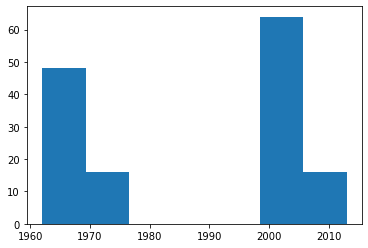

In [18]:
hof_df_sorted = hof_df.sort_values('Inducted')
plt.hist(hof_df_sorted['Inducted'],bins=7)
plt.show()

<AxesSubplot:xlabel='Inducted'>

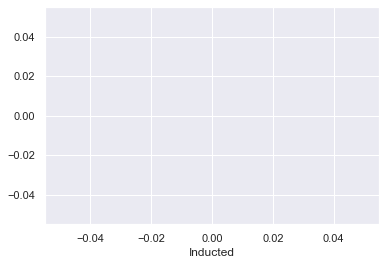

In [25]:
sns.set_theme(style='darkgrid')
df.groupby(df.count().reset.index()
sns.lineplot(x="Inducted", y= ,data=hof_df)